In [146]:
import numpy as np
import matplotlib.pyplot as plt

# ***W1+2: Linear Regression***

In [147]:
theta = np.array([[0.3]])
theta_0 = 1

In [148]:
def f_real(X):
  return 0.05 * X**2 - 0.5*X + 1.5

X = np.random.randint(1, 30, 20)
y = f_real(X)

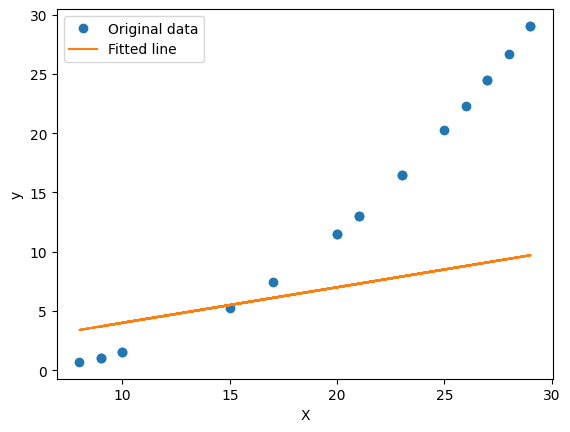

In [149]:
y_pred = (theta * X + theta_0).flatten()

plt.plot(X, y, 'o', label='Original data')
plt.plot(X, y_pred, '-', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [150]:
X = X.reshape(-1, 1)

In [151]:
X.shape, theta.shape

((20, 1), (1, 1))

## **Training error (RMSE) for linear regression**

In [152]:
n = X.shape[0]
y_pred = theta.T.dot(X) + theta_0

ValueError: shapes (1,1) and (20,1) not aligned: 1 (dim 1) != 20 (dim 0)

`prompt: hint to write traning error of linear regression (no code)`

import numpy as np
The training error of a linear regression model is typically calculated as the mean squared error (MSE) between the predicted values (y_pred) and the actual values (y) in your training dataset.  You've already got most of the pieces:

1. **Calculate the difference between predicted and actual values:**  `y_pred - y`

2. **Square the differences:**  `(y_pred - y)**2`

3. **Sum the squared differences:** `np.sum((y_pred - y)**2)`

4. **Divide by the number of data points (n):** `1/n * ...`

You're very close with the code you've already written! The issue lies in how you're using `theta`.  You need to ensure the matrix multiplication is correctly sized and that you're adding `theta_0` correctly.  Review the dimensions of `theta` and `X`, and how you incorporate the intercept (`theta_0`).


In [153]:
y_pred = theta.T.dot(X.T) + theta_0

### Mistake 1: transpose X because of wrong dimension when initialized

In [154]:
def RMSE(theta, theta_0, X, y):
    X = X.reshape(-1, 1)
    y_pred = theta.T.dot(X.T) + theta_0
    n = X.shape[0]
    mse = (1 / n) * np.sum((y_pred.flatten() - y)**2)
    return mse

# Example usage:
error = RMSE(theta, theta_0, X, y)
print(f"Training Error (MSE): {error}")

Training Error (MSE): 106.41212500000005


## **Direct Solution**

In [130]:
X_T = X.reshape(-1, 1).T
theta_optimal = np.linalg.inv(X_T.T.dot(X_T)).dot(X_T.T).dot(y)

LinAlgError: Singular matrix

Optimal theta: [-6.9028842   1.04281102]
[[-6.9028842]] 1.0428110202324585


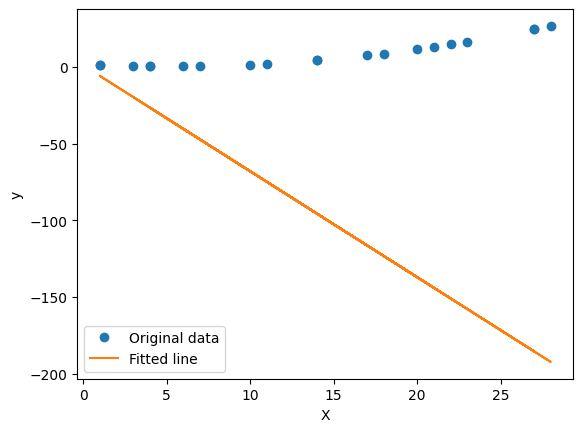

Training error:  15484.064994686287


In [155]:
import numpy as np

def direct_linear_regression(X, y):
    """
    Calculates the optimal theta using the direct solution for linear regression.

    Args:
        X: A NumPy array of shape (n_samples,) representing the input features.
        y: A NumPy array of shape (n_samples,) representing the target values.

    Returns:
        A NumPy array representing the optimal theta values.
        Returns None if the matrix is singular.
    """
    X = X.reshape(-1, 1)  # Reshape X to be a column vector
    X_b = np.c_[np.ones((len(X), 1)), X]  # Add a column of ones for the intercept
    try:
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        return theta_best
    except np.linalg.LinAlgError:
        print("Matrix is singular, cannot compute inverse.")
        return None

X = np.random.randint(1, 30, 20)
y = f_real(X)

theta_best = direct_linear_regression(X, y)

if theta_best is not None:
    print("Optimal theta:", theta_best)

    X_val = np.random.randint(1, 30, 20)
    y_val = f_real(X_val)

    theta_cpy = np.array([theta_best])
    theta = np.array([theta_cpy[0][:-1]])
    theta_0 = theta_cpy[0][-1]
    y_val_pred = (theta * X_val + theta_0).flatten()
    print(theta, theta_0)

    plt.plot(X_val, y_val, 'o', label='Original data')
    plt.plot(X_val, y_val_pred, '-', label='Fitted line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    print("Training error: ", RMSE(theta, theta_0, X_val, y_val))

### Mistake 2: Forget to add a column of ones for the intercept